In [1]:
import lsst.daf.persistence as dafPersist
import re
import pickle
import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools


from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np

import multiprocessing

import sncosmo

In [2]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production"
butler_tests = dafPersist.Butler(DATADIR+"/tests_mpi_diff") 
butler_control = dafPersist.Butler(DATADIR+"/control_mpi_diff") 

In [3]:
days = []
with open(DATADIR+"/days_04.txt", "rb") as dayFile:
    for line in dayFile:
            line = line.replace('\n','')
            #text = re.split("=| ",line)
            days.append(line)

patches= []
with open(DATADIR+"/patches.txt", "rb") as patches_file:
    for line in patches_file:
            line = line.replace('\n','')
            text = re.split("=| ",line)
            patches.append(text[-1])

In [4]:
actual_patches = []


for patch in patches:
        if butler_tests.datasetExists("deepCoadd_calexp", dataId={"tract":0, "patch":patch, "filter":"r"}) == True:
            actual_patches.append(patch)

NameError: name 'patches' is not defined

In [8]:
day="2004-04-14"
srcs_test = []
srcs_control = []

for patch in actual_patches:
    dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}
    
    if butler_tests.datasetExists("dayDiff_class_diaSrc",dataId=dataId) and butler_control.datasetExists("dayDiff_class_diaSrc",dataId=dataId):
    
        cls_srcs_tests = butler_tests.get("dayDiff_class_diaSrc",dataId=dataId)
        srcs_test.append(len(cls_srcs_tests))
        cls_srcs_control = butler_control.get("dayDiff_class_diaSrc",dataId=dataId)
        srcs_control.append(len(cls_srcs_control))

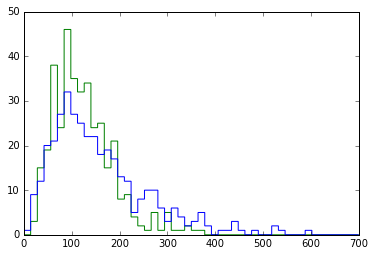

In [9]:
plt.hist(srcs_control, bins=50, range=(0,700), color="green",histtype="step")
plt.hist(srcs_test, bins=50, range=(0,700), color="blue",histtype="step")

plt.xlim(xmax=700)
plt.show()

In [10]:
srcs_test = []
srcs_control = []
problematic = []
for day in days:
    for patch in actual_patches:
        dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}

        if butler_tests.datasetExists("dayDiff_class_diaSrc",dataId=dataId) and butler_control.datasetExists("dayDiff_class_diaSrc",dataId=dataId):

            cls_srcs_tests = butler_tests.get("dayDiff_class_diaSrc",dataId=dataId)
            srcs_test.append(len(cls_srcs_tests))
            cls_srcs_control = butler_control.get("dayDiff_class_diaSrc",dataId=dataId)
            srcs_control.append(len(cls_srcs_control))
            if len(cls_srcs_tests)>len(cls_srcs_control):
                problematic.append((day, patch))

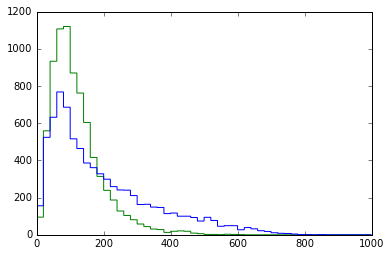

In [11]:
x_max= 1000
plt.hist(srcs_control, bins=50, range=(0,x_max), color="green",histtype="step")
plt.hist(srcs_test, bins=50, range=(0,x_max), color="blue",histtype="step")

plt.xlim(xmax=x_max)
plt.show()

In [12]:
len(srcs_control)

7778

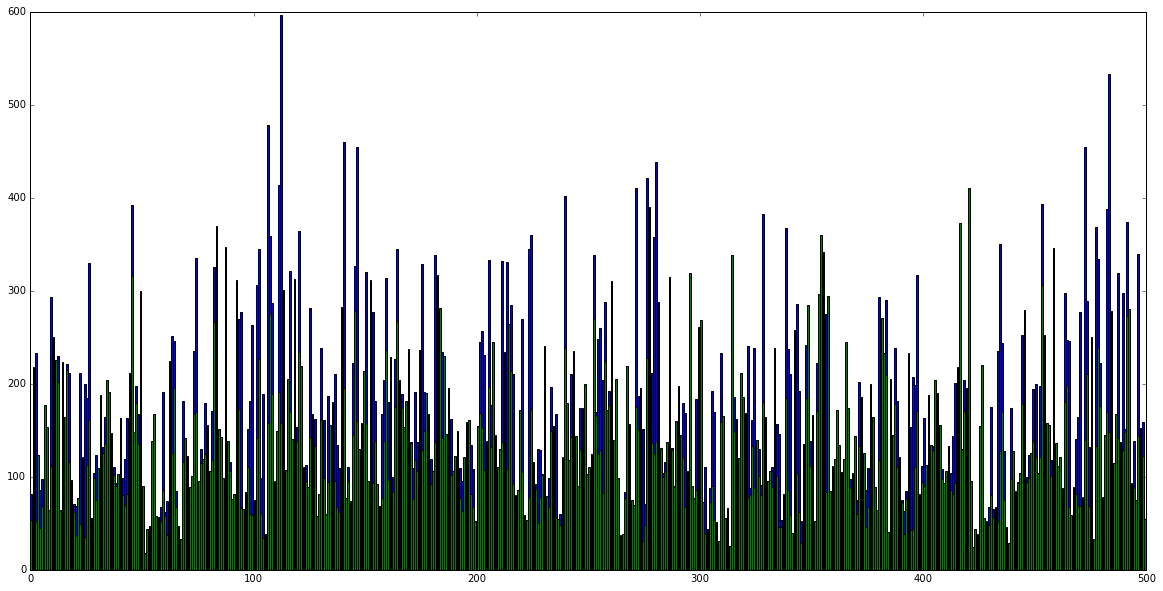

In [13]:
plt.figure(figsize=(20,10))
plt.bar(range(len(srcs_test[:500])),srcs_test[:500], color="blue")
plt.bar(range(len(srcs_control[:500])),srcs_control[:500], color="green")

plt.show()

In [14]:
problematic

[('2004-03-19', '5,7'),
 ('2004-03-19', '5,8'),
 ('2004-03-19', '5,9'),
 ('2004-03-19', '5,13'),
 ('2004-03-19', '5,14'),
 ('2004-03-19', '5,21'),
 ('2004-03-19', '6,6'),
 ('2004-03-19', '6,8'),
 ('2004-03-19', '6,10'),
 ('2004-03-19', '6,11'),
 ('2004-03-19', '6,13'),
 ('2004-03-19', '6,14'),
 ('2004-03-19', '6,16'),
 ('2004-03-19', '6,17'),
 ('2004-03-19', '6,18'),
 ('2004-03-19', '6,19'),
 ('2004-03-19', '6,20'),
 ('2004-03-19', '6,22'),
 ('2004-03-19', '6,23'),
 ('2004-03-19', '7,7'),
 ('2004-03-19', '7,8'),
 ('2004-03-19', '7,12'),
 ('2004-03-19', '7,13'),
 ('2004-03-19', '7,15'),
 ('2004-03-19', '7,16'),
 ('2004-03-19', '7,17'),
 ('2004-03-19', '7,18'),
 ('2004-03-19', '7,19'),
 ('2004-03-19', '7,20'),
 ('2004-03-19', '7,22'),
 ('2004-03-19', '7,23'),
 ('2004-03-19', '7,24'),
 ('2004-03-19', '8,14'),
 ('2004-03-19', '8,15'),
 ('2004-03-19', '8,16'),
 ('2004-03-19', '8,17'),
 ('2004-03-19', '8,18'),
 ('2004-03-19', '8,19'),
 ('2004-03-19', '8,20'),
 ('2004-03-19', '8,21'),
 ('2004

In [15]:
dataId = {"tract":0, "date":'2004-04-26', "patch":'10,15', "filter":"r"}
c_tests = butler_tests.get("dayDiff_class_diaSrc",dataId=dataId)
c_control = butler_control.get("dayDiff_class_diaSrc",dataId=dataId)

In [16]:
len(c_tests), len(c_control)

(238, 111)

In [17]:
t_patches = ["14,14","15,15","14,15","12,12","16,16","17,17","14,17","15,17","16,17","15,14", "12,13","12,14","12,15","12,16","12,17","13,13","13,14","13,15","13,16","13,17"]


In [18]:

days_dict = {}
for day in days:
    srcs_test_1 = []
    srcs_control_1 = []
    for patch in t_patches:
        dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}

        if butler_tests.datasetExists("dayDiff_class_diaSrc",dataId=dataId) and butler_control.datasetExists("dayDiff_class_diaSrc",dataId=dataId):

            cls_srcs_tests = butler_tests.get("dayDiff_class_diaSrc",dataId=dataId)
            srcs_test_1.append(len(cls_srcs_tests))
            cls_srcs_control = butler_control.get("dayDiff_class_diaSrc",dataId=dataId)
            srcs_control_1.append(len(cls_srcs_control))
    
    days_dict[day] = (srcs_test_1, srcs_control_1)

In [19]:
days_dict.keys()

['2004-04-14',
 '2004-04-17',
 '2004-06-13',
 '2004-07-07',
 '2004-07-09',
 '2004-03-19',
 '2004-05-24',
 '2004-05-09',
 '2004-06-19',
 '2004-05-21',
 '2004-03-16',
 '2004-03-17',
 '2004-03-30',
 '2004-06-09',
 '2004-04-26',
 '2004-04-21',
 '2004-04-22',
 '2004-05-26',
 '2004-04-28',
 '2004-06-26',
 '2004-06-22',
 '2004-06-21',
 '2004-07-14',
 '2004-07-16',
 '2004-07-11',
 '2004-07-12',
 '2004-05-13',
 '2004-07-18']

In [20]:
days_dict['2004-04-14']

([109,
  97,
  171,
  37,
  263,
  53,
  232,
  101,
  196,
  84,
  160,
  97,
  117,
  250,
  119,
  277,
  251,
  208,
  100,
  80],
 [87,
  118,
  117,
  65,
  127,
  54,
  126,
  68,
  132,
  107,
  79,
  141,
  173,
  171,
  137,
  68,
  92,
  143,
  121,
  119])

In [21]:
days_dict['2004-06-13']

([83,
  86,
  161,
  28,
  190,
  69,
  120,
  95,
  208,
  55,
  131,
  78,
  95,
  168,
  97,
  280,
  235,
  114,
  73,
  48],
 [61,
  99,
  153,
  59,
  110,
  72,
  66,
  67,
  111,
  75,
  59,
  91,
  91,
  62,
  43,
  87,
  70,
  132,
  76,
  54])

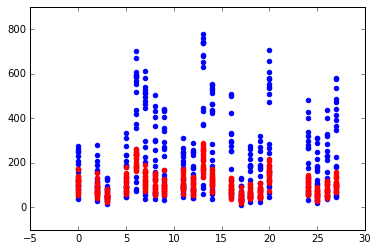

In [22]:


for i, day in enumerate(days_dict.keys()):
        test_arr, control_arr = days_dict[day]
        plt.scatter([i]*len(test_arr),test_arr, color="blue")
        plt.scatter([i]*len(control_arr),control_arr, color="red")
        
plt.show()

In [81]:
test_days =  ["2005-02-10"]
for i, day in enumerate(test_days):
        test_arr, control_arr = days_dict[day]
        plt.scatter([i]*len(test_arr),test_arr, color="blue")
        plt.scatter([i]*len(control_arr),control_arr, color="red"),
        
plt.show()

KeyError: '2005-02-10'

In [23]:
visits = [780355,780353,780352,780354,780356,800717,800718,802229,802230,800719,801145,802227,802231,800720,802228]

In [5]:
print DATADIR

/datadec/cppm/jpreyes/CFHT_Production


In [6]:
DATA_ALT = "/datadec/cppm/jpreyes/CFHT_Complete"
directory = DATADIR+"/detect_testSN_2/"
print directory
but = dafPersist.Butler(DATADIR+"/detect_testSN_2/") 

/datadec/cppm/jpreyes/CFHT_Production/detect_testSN_2/


RuntimeError: Input repositories must exist; no repo found at /datadec/cppm/jpreyes/CFHT_Production/detect_mini. (A Butler V1 Repository 'exists' if the root  folder exists AND contains items.)

In [36]:
clxps = []
for v in visits:
    dataId = {"visit":v, "ccd":21, "filter":"r"}
    clxps.append(butler_control.get("calexp", dataId=dataId))

In [37]:
for cal in clxps:
    m = cal.getMetadata()
    print m.get("AIRMASS")

NotFoundError: AIRMASS not found

In [29]:
m.toString()

u'SIMPLE = 1\n// file does conform to FITS standard\nBITPIX = 8\n// number of bits per data pixel\nNAXIS = 0\n// number of data axes\nEXTEND = 1\n// FITS dataset may contain extensions\nCOMMENT = [ "  FITS (Flexible Image Transport System) format is defined in \'Astronomy", "  and Astrophysics\', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 780355o42, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "Processing Pipeline", "-------------------", "Unique detector IDs for MegaCam (North on top, East to the left

In [8]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production"
butler_1 = dafPersist.Butler(DATADIR+"/tests_reroll") 
butler_2 = dafPersist.Butler(DATADIR+"/control_reroll") 

In [9]:
 dataId = {"tract":0, "date":'2004-05-09', "patch":'14,14', "filter":"r"}

In [10]:
test = butler_1.get("dayDiff_class_diaSrc", dataId=dataId)
control = butler_2.get("dayDiff_class_diaSrc", dataId=dataId)

In [11]:
len(test)

92

In [12]:
len(control)

138

In [ ]:
more lo